In [1]:
%matplotlib inline
from matplotlib import style
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

---
# Reflect Tables into SQLAlchemy ORM

In [4]:
import sqlalchemy
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine, func, inspect

In [5]:
engine=create_engine('sqlite:///Resources/hawaii.sqlite')

In [6]:
Base=automap_base()
Base.prepare(engine, reflect=True)

In [7]:
Base.classes.keys()

['measurement', 'station']

In [8]:
Station=Base.classes.station
Measurement=Base.classes.measurement

In [9]:
session=Session(engine)

In [10]:
inspector=inspect(engine)

### Inspect Tables

---
##### Station Table

In [11]:
stations=engine.execute('SELECT * FROM Station')

In [12]:
print(stations.keys())

RMKeyView(['id', 'station', 'name', 'latitude', 'longitude', 'elevation'])


In [13]:
stations.fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [14]:
columns=inspector.get_columns('Station')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


---
##### Measurement Table

In [15]:
measurements=engine.execute('SELECT * FROM Measurement LIMIT 15')

In [16]:
print(measurements.keys())

RMKeyView(['id', 'station', 'date', 'prcp', 'tobs'])


In [17]:
measurements.fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0)]

In [18]:
columns=inspector.get_columns('Measurement')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


---
# Exploratory Climate Analysis

---
###  - Precipitation Analysis

Plot of the last 12 months of the precipitation data and its summary statistics.

---
##### The Latest Date in The Dataset

In [19]:
latest_date=(session.query(Measurement.date)
                    .order_by(Measurement.date.desc())
                    .first())
latest_date

('2017-08-23',)

##### The Date 1 Year Before  The Latest Date in The Dataset

In [20]:
year_ago_date=dt.date(2017, 8, 23) - dt.timedelta(days=366)
print('Query Date:', year_ago_date)

Query Date: 2016-08-22


##### Max Precipitation Scores For The Last Year in The Dataset

In [21]:
year_prcp=(session.query(Measurement.date,func.max(Measurement.prcp))
                  .filter(func.strftime('%Y-%m-%d',Measurement.date) > year_ago_date)
                  .group_by(Measurement.date)
                  .all())
year_prcp

[('2016-08-23', 1.79),
 ('2016-08-24', 2.28),
 ('2016-08-25', 0.21),
 ('2016-08-26', 0.04),
 ('2016-08-27', 0.18),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.05),
 ('2016-08-31', 2.46),
 ('2016-09-01', 0.02),
 ('2016-09-02', 0.19),
 ('2016-09-03', 1.0),
 ('2016-09-04', 0.74),
 ('2016-09-05', 0.18),
 ('2016-09-06', 1.0),
 ('2016-09-07', 1.35),
 ('2016-09-08', 0.22),
 ('2016-09-09', 0.35),
 ('2016-09-10', 1.16),
 ('2016-09-11', 0.6),
 ('2016-09-12', 1.04),
 ('2016-09-13', 1.2),
 ('2016-09-14', 6.7),
 ('2016-09-15', 3.35),
 ('2016-09-16', 0.61),
 ('2016-09-17', 0.36),
 ('2016-09-18', 0.42),
 ('2016-09-19', 0.25),
 ('2016-09-20', 0.43),
 ('2016-09-21', 1.02),
 ('2016-09-22', 0.75),
 ('2016-09-23', 0.94),
 ('2016-09-24', 0.27),
 ('2016-09-25', 0.04),
 ('2016-09-26', 1.02),
 ('2016-09-27', 1.0),
 ('2016-09-28', 0.08),
 ('2016-09-29', 1.49),
 ('2016-09-30', 0.38),
 ('2016-10-01', 1.02),
 ('2016-10-02', 0.61),
 ('2016-10-03', 0.46),
 ('2016-10-04', 3.46),
 ('2016-10-05', 0.

##### Precipitation Query Results as  Pandas DataFrame

In [22]:
prcp_df=pd.DataFrame(year_prcp, columns=['date', 'prcp'])
prcp_df.set_index('date',inplace=True)
prcp_df.head(10)

,prcp
date,
2016-08-23,1.79
2016-08-24,2.28
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18
2016-08-28,2.07
2016-08-29,0.90
2016-08-30,0.05
2016-08-31,2.46


##### Precipitation DataFrame Sorted by Date

In [23]:
prcp_df.sort_values('date')

,prcp
date,
2016-08-23,1.79
2016-08-24,2.28
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.56


##### Daily Maximum Precipitation for One Year in Honolulu, Hawaii

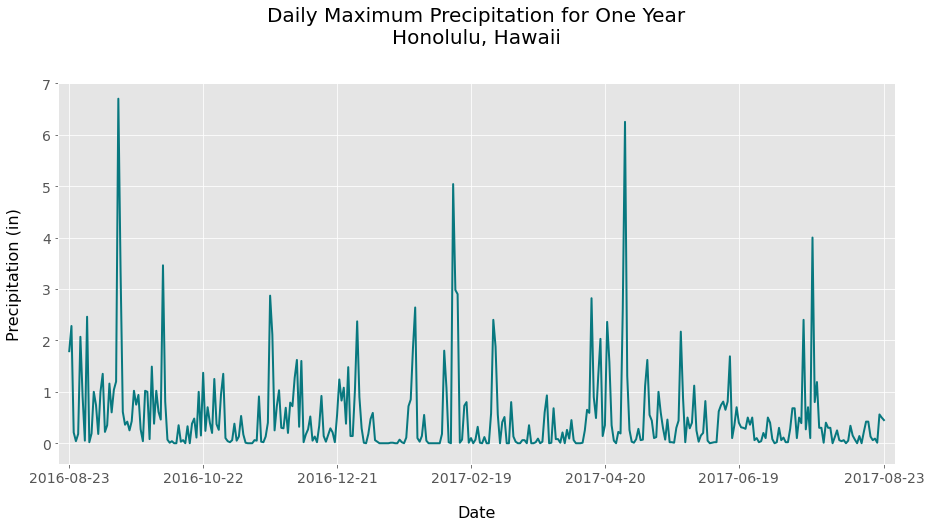

In [24]:
plt.rcParams['figure.figsize']=(15,7)
prcp_df.plot(linewidth=2,alpha=1,rot=0, 
             xticks=(0,60,120,180,240,300,365),
             color='xkcd:deep aqua')

plt.xlim(-5,370)
plt.ylim(-0.4,7)
plt.yticks(size=14)
plt.xticks(fontsize=14)
plt.legend('',frameon=False)
plt.xlabel('Date',fontsize=16,color='black',labelpad=20)
plt.ylabel('Precipitation (in)',fontsize=16,color='black',labelpad=20)
plt.title('Daily Maximum Precipitation for One Year\nHonolulu, Hawaii',fontsize=20,pad=40)

plt.show()

##### All Precipitation Scores For The Last Year in The Dataset

In [25]:
year_prcp_stats=(session.query(Measurement.date, Measurement.prcp)
                        .filter(Measurement.date > year_ago_date)
                        .all())
year_prcp_stats

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [26]:
year_prcp_stats_df=pd.DataFrame(year_prcp_stats, columns=['date', 'prcp'])
year_prcp_stats_df
year_prcp_stats_df.dropna()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2223,2017-08-17,0.13
2225,2017-08-19,0.09
2227,2017-08-21,0.56
2228,2017-08-22,0.50


##### Summary Statistics For The Precipitation Data

In [27]:
year_prcp_stats_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


---
### - Station Analysis

Temperature observation data (TOBS) for the last 12 months and histogram plot for the station with the highest number of observations.

---
##### Number of Stations in The Dataset

In [28]:
total_stations=session.query(Station).count()
print(f'There are {total_stations} stations at Honolulu, Hawaii.')

There are 9 stations at Honolulu, Hawaii.


##### Station Activity

In [29]:
station_activity=(session.query(Measurement.station,func.count(Measurement.station))
                         .group_by(Measurement.station)
                         .order_by(func.count(Measurement.station).desc())
                         .all())
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

##### Min, Avg, and Max Temperature Records of The Most Active Station

In [30]:
tobs=[Measurement.station, 
             func.min(Measurement.tobs), 
             func.max(Measurement.tobs), 
             func.avg(Measurement.tobs)]

most_active_st=(session.query(*tobs)
                       .filter(Measurement.station=='USC00519281')
                       .all())
most_active_st

most_active_st_temp=pd.DataFrame(most_active_st, columns=['station', 'min_temp', 
                                                          'max_temp', 'avg_temp'])
most_active_st_temp.set_index('station', inplace=True)
most_active_st_temp

,min_temp,max_temp,avg_temp
station,,,
USC00519281,54.0,85.0,71.663781


##### Temperature Observations Between Aug 2016 and  Aug 2017 at USC00519281 Station

In [31]:
year_tobs=(session.query(Measurement.date,(Measurement.tobs))
                  .filter(func.strftime(Measurement.date) > year_ago_date)
                  .filter(Measurement.station=='USC00519281')
                  .all())
year_tobs

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

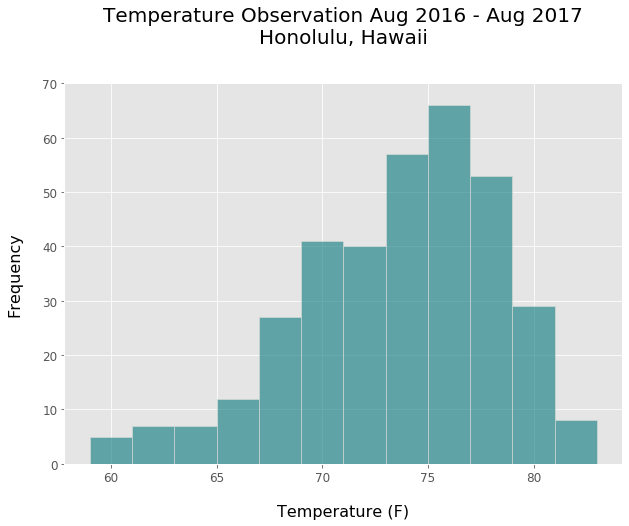

In [1089]:
tobs_df=pd.DataFrame(year_tobs)
tobs_df.set_index('date',inplace=True)

plt.rcParams['figure.figsize']=(10,7)
plt.hist(tobs_df['tobs'],bins=12,alpha=0.6,edgecolor='xkcd:light gray',
         linewidth=1,color='xkcd:deep aqua')

plt.title('Temperature Observation Aug 2016 - Aug 2017\nHonolulu, Hawaii',fontsize=20,pad=40)
plt.xlabel('Temperature (F)',fontsize=16,color='black',labelpad=20)
plt.ylabel('Frequency',fontsize=16,color='black',labelpad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,70)

plt.show()

---
## Bonus Challenge Assignment

---

---
### - Temperature Analysis II

---
##### Min, Avg, and Max Temperature for The Trip Dates

In [33]:
start_date='2017-08-05'
end_date='2017-08-15'

def calc_temps(start_date,end_date):
    
    return (session.query(func.min(Measurement.tobs), 
                          func.round(
                          func.avg(Measurement.tobs)), 
                          func.max(Measurement.tobs))
                   .filter(Measurement.date >= start_date)
                   .filter(Measurement.date <= end_date)
                   .all())

trip_temp=calc_temps(start_date,end_date)
#print(trip_temp)

trip_temp_df=pd.DataFrame({'start_date': start_date,
                           'end_date': end_date,
                           'min_temp': [trip_temp[0][0]],
                           'avg_temp': [trip_temp[0][1]],
                           'max_temp': [trip_temp[0][2]]
                          })
trip_temp_df.set_index(['start_date','end_date'],inplace=True)
trip_temp_df

,,min_temp,avg_temp,max_temp
start_date,end_date,,,
2017-08-05,2017-08-15,70.0,79.0,84.0


##### Trip Average Temperature and Error Bar (YERR)

In [34]:
tavg = [int(result[1]) for result in trip_temp[::]]
tavg

[79]

In [35]:
tmax_tmin=(session.query(func.max(Measurement.tobs) - func.min(Measurement.tobs))
                  .filter(Measurement.date >= start_date)
                  .filter(Measurement.date <= end_date)
                  .all())
    
ptp=list(np.ravel(tmax_tmin))
ptp

[14.0]

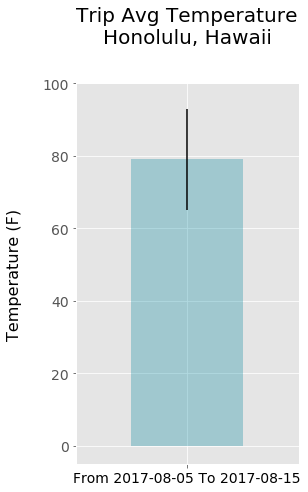

In [1099]:
plt.rcParams['figure.figsize']=(4,7)
tick_locations = [value for value in x_axis]

plt.bar(x_axis,tavg, color='xkcd:teal blue', alpha=0.3, width=0.1,align="center",yerr=ptp[0])
plt.xticks(tick_locations, [(f'From {start_date} To {end_date}')],fontsize=14,color='black')
plt.title('Trip Avg Temperature\nHonolulu, Hawaii',fontsize=20,pad=40)
plt.ylabel('Temperature (F)',fontsize=16,color='black',labelpad=20)
plt.yticks(fontsize=14)
plt.xlim(-0.1,0.1)
plt.ylim(-5,100)

plt.show()

---
### - Daily Rainfall Estimate

---
##### Daily Total Rainfall by Station for The Trip Dates

In [36]:
total_prcp_by_st=(session.query(Measurement.station,Station.name,func.sum(Measurement.prcp),
                                Station.latitude,Station.longitude,Station.elevation)
                         .filter(Measurement.date >= start_date)
                         .filter(Measurement.date <= end_date)
                         .filter(Measurement.station == Station.station)
                         .group_by(Measurement.station)
                         .order_by(func.sum(Measurement.prcp)
                         .desc())
                         .all())

In [37]:
print(f'Daily total rainfall estimates by station for dates between {start_date} and {end_date}.')

total_prcp_by_st_df=pd.DataFrame(total_prcp_by_st,
                                 columns=['station','name',
                                          'total_prcp','latitude',
                                          'longitude','elevation'])
total_prcp_by_st_df

Daily total rainfall estimates by station for dates between 2017-08-05 and 2017-08-15.


,station,name,total_prcp,latitude,longitude,elevation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",1.39,21.33310,-157.80250,152.4
1,USC00519281,"WAIHEE 837.5, HI US",0.38,21.45167,-157.84889,32.9
2,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",0.14,21.33556,-157.71139,19.5
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",0.11,21.52130,-157.83740,7.0
4,USC00519397,"WAIKIKI 717.2, HI US",0.02,21.27160,-157.81680,3.0


---
### - Daily Temperature Normals

---

In [38]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

##### Daily Temperature Normals For Trip Dates

In [1104]:
trip_dates=['08-05','08-06','08-07','08-08','08-09',
            '08-10','08-11','08-12','08-13','08-14','08-15']

normals=[]
    
def daily_normals(date):
    sel = [func.min(Measurement.tobs), 
           func.round(func.avg(Measurement.tobs),2), 
           func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

for i in trip_dates:
    normals.append(daily_normals(i)[0])

normals

In [39]:
trip_daily_normals_df=pd.DataFrame(normals,columns=['min_temp','avg_temp','max_temp'],
                                   index=trip_dates)

trip_daily_normals_df.index.name='date'
trip_daily_normals_df

NameError: name 'normals' is not defined

##### Trip Daily Temperature Normals Plot

---
### - Temperature Analysis I

---

In [41]:
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Float

class HawaiiPrcpTobs(Base):
   __tablename__ = 'prcptobs'
   id = Column(Integer, primary_key = True)
   station = Column(String)
   date = Column(String)
   prcp = Column(Float)
   tobs = Column(Float)

In [42]:
hm_df=pd.read_csv('Resources/hawaii_measurements.csv')
hm_df

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73
...,...,...,...,...
19545,USC00516128,2017-08-19,0.09,71
19546,USC00516128,2017-08-20,NaN,78
19547,USC00516128,2017-08-21,0.56,76
19548,USC00516128,2017-08-22,0.50,76


In [43]:
engine=create_engine('sqlite:///hawaii_measurements.sqlite')
hm_df.to_sql('prcptobs', engine, if_exists='append', index=False)

In [44]:
Base.metadata.create_all(engine)
session=Session(bind=engine)

##### Testing Data

In [45]:
hm_df=engine.execute('SELECT * FROM prcptobs')
hm_df.fetchall()

[('USC00519397', '2010-01-01', 0.08, 65),
 ('USC00519397', '2010-01-02', 0.0, 63),
 ('USC00519397', '2010-01-03', 0.0, 74),
 ('USC00519397', '2010-01-04', 0.0, 76),
 ('USC00519397', '2010-01-06', None, 73),
 ('USC00519397', '2010-01-07', 0.06, 70),
 ('USC00519397', '2010-01-08', 0.0, 64),
 ('USC00519397', '2010-01-09', 0.0, 68),
 ('USC00519397', '2010-01-10', 0.0, 73),
 ('USC00519397', '2010-01-11', 0.01, 64),
 ('USC00519397', '2010-01-12', 0.0, 61),
 ('USC00519397', '2010-01-14', 0.0, 66),
 ('USC00519397', '2010-01-15', 0.0, 65),
 ('USC00519397', '2010-01-16', 0.0, 68),
 ('USC00519397', '2010-01-17', 0.0, 64),
 ('USC00519397', '2010-01-18', 0.0, 72),
 ('USC00519397', '2010-01-19', 0.0, 66),
 ('USC00519397', '2010-01-20', 0.0, 66),
 ('USC00519397', '2010-01-21', 0.0, 69),
 ('USC00519397', '2010-01-22', 0.0, 67),
 ('USC00519397', '2010-01-23', 0.0, 67),
 ('USC00519397', '2010-01-24', 0.01, 71),
 ('USC00519397', '2010-01-25', 0.0, 67),
 ('USC00519397', '2010-01-26', 0.04, 76),
 ('USC0051

In [46]:
print(hm_df.keys())

RMKeyView(['station', 'date', 'prcp', 'tobs'])


In [47]:
hm_df=engine.execute('SELECT station FROM prcptobs ORDER BY station')
hm_df.fetchall()

[('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC00511918',),
 ('USC005119

In [48]:
session.query(HawaiiPrcpTobs.station).group_by(HawaiiPrcpTobs.station).all()

[('USC00511918',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00516128',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519281',),
 ('USC00519397',),
 ('USC00519523',)]

In [49]:
session.query(HawaiiPrcpTobs.station,func.max(HawaiiPrcpTobs.tobs)).group_by(HawaiiPrcpTobs.station).all()

[('USC00511918', 87),
 ('USC00513117', 85),
 ('USC00514830', 85),
 ('USC00516128', 84),
 ('USC00517948', 87),
 ('USC00518838', 83),
 ('USC00519281', 85),
 ('USC00519397', 87),
 ('USC00519523', 85)]

##### Average Temperature in June and December

In [50]:
from scipy import stats
from scipy import mean

In [51]:
avg_temp_j=(session.query(func.avg(HawaiiPrcpTobs.tobs))
                  .filter(func.strftime('%m',HawaiiPrcpTobs.date) == '06')
                  .all())
avg_temp_j

[(74.94411764705882,)]

In [52]:
avg_temp_d=(session.query(func.avg(HawaiiPrcpTobs.tobs))
                  .filter(func.strftime('%m',HawaiiPrcpTobs.date) == '12')
                  .all())
avg_temp_d

[(71.04152933421226,)]

##### June TOBS for All  Years in The Data Set

In [53]:
june_temp=(session.query(HawaiiPrcpTobs.date,HawaiiPrcpTobs.tobs)
               .filter(func.strftime('%m',HawaiiPrcpTobs.date) == '06')
               .all())
june_temp

[('2010-06-01', 78),
 ('2010-06-02', 76),
 ('2010-06-03', 78),
 ('2010-06-04', 76),
 ('2010-06-05', 77),
 ('2010-06-06', 78),
 ('2010-06-07', 77),
 ('2010-06-08', 78),
 ('2010-06-09', 78),
 ('2010-06-10', 79),
 ('2010-06-11', 78),
 ('2010-06-12', 78),
 ('2010-06-13', 78),
 ('2010-06-14', 77),
 ('2010-06-15', 78),
 ('2010-06-16', 78),
 ('2010-06-17', 77),
 ('2010-06-18', 77),
 ('2010-06-19', 82),
 ('2010-06-20', 78),
 ('2010-06-21', 78),
 ('2010-06-22', 78),
 ('2010-06-23', 78),
 ('2010-06-24', 78),
 ('2010-06-25', 77),
 ('2010-06-26', 76),
 ('2010-06-27', 78),
 ('2010-06-28', 78),
 ('2010-06-29', 78),
 ('2010-06-30', 78),
 ('2011-06-01', 77),
 ('2011-06-02', 78),
 ('2011-06-03', 73),
 ('2011-06-04', 70),
 ('2011-06-05', 76),
 ('2011-06-06', 77),
 ('2011-06-07', 77),
 ('2011-06-08', 77),
 ('2011-06-09', 77),
 ('2011-06-10', 78),
 ('2011-06-11', 77),
 ('2011-06-12', 77),
 ('2011-06-13', 78),
 ('2011-06-14', 78),
 ('2011-06-15', 77),
 ('2011-06-17', 78),
 ('2011-06-18', 78),
 ('2011-06-19

##### December TOBS for All  Years in The Dataset

In [54]:
december_temp=(session.query(HawaiiPrcpTobs.date,HawaiiPrcpTobs.tobs)
               .filter(func.strftime('%m',HawaiiPrcpTobs.date) == '12')
               .all())
december_temp

[('2010-12-01', 76),
 ('2010-12-03', 74),
 ('2010-12-04', 74),
 ('2010-12-06', 64),
 ('2010-12-07', 64),
 ('2010-12-08', 67),
 ('2010-12-09', 77),
 ('2010-12-10', 66),
 ('2010-12-11', 69),
 ('2010-12-12', 68),
 ('2010-12-13', 68),
 ('2010-12-14', 71),
 ('2010-12-15', 74),
 ('2010-12-16', 67),
 ('2010-12-17', 66),
 ('2010-12-18', 69),
 ('2010-12-19', 71),
 ('2010-12-23', 70),
 ('2010-12-24', 70),
 ('2010-12-26', 74),
 ('2010-12-27', 74),
 ('2010-12-28', 71),
 ('2010-12-29', 75),
 ('2010-12-30', 75),
 ('2010-12-31', 72),
 ('2011-12-01', 69),
 ('2011-12-02', 68),
 ('2011-12-03', 73),
 ('2011-12-04', 74),
 ('2011-12-05', 73),
 ('2011-12-06', 73),
 ('2011-12-07', 73),
 ('2011-12-08', 73),
 ('2011-12-09', 71),
 ('2011-12-10', 73),
 ('2011-12-11', 73),
 ('2011-12-12', 77),
 ('2011-12-13', 72),
 ('2011-12-14', 71),
 ('2011-12-15', 73),
 ('2011-12-16', 70),
 ('2011-12-17', 73),
 ('2011-12-18', 69),
 ('2011-12-19', 74),
 ('2011-12-20', 72),
 ('2011-12-21', 71),
 ('2011-12-22', 72),
 ('2011-12-23

##### Filtering Out Null Values From June and December TOBS Lists

In [55]:
j_temp_list = []
for temp in june_temp:
    if type(temp.tobs) == int:
        j_temp_list.append(temp.tobs)
        
d_temp_list = []
for temp in december_temp:
    if type(temp.tobs) == int:
        d_temp_list.append(temp.tobs)

##### Average Temperature in June at All Stations Across All Available Years in The Dataset

##### Average Temperature in December at All Stations Across All Available Years in The Dataset

In [57]:
mean(d_temp_list)

<ipython-input-57-eec9ae519eef>:1: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mean(d_temp_list)


71.04152933421226

##### Paired T-Test

+ Paired t-test is used to determine the difference in the June and December average temperature in Honolulu, Hawaii for a time period between 2010 and 2017. The paired t-test is used because the two compared samples of temperature observations are related to the same location and represent a difference between summer temperature (after a cold season is over) and winter temperature (after a worm season is over).


+ The null hypothesis in this case is that there is no statistically significant difference in the mean of June temperature and December temperature in Honolulu, Hawaii.

In [58]:
stats.ttest_rel(j_temp_list[0:200],d_temp_list[0:200])

Ttest_relResult(statistic=21.812993236189637, pvalue=1.1467721770953326e-54)

+ The t-statistic value is 21.813, and along with a given degrees of freedom (199) this can be used to calculate a p-value.


+ The p-value in this case is 1.1468e-54, which is far less than the standard thresholds of 0.05 or 0.01, so the null hypothesis is rejected and it can be concluded that there is a statistically significant difference between the June temperature and the December temperature in Honolulu, Hawaii.